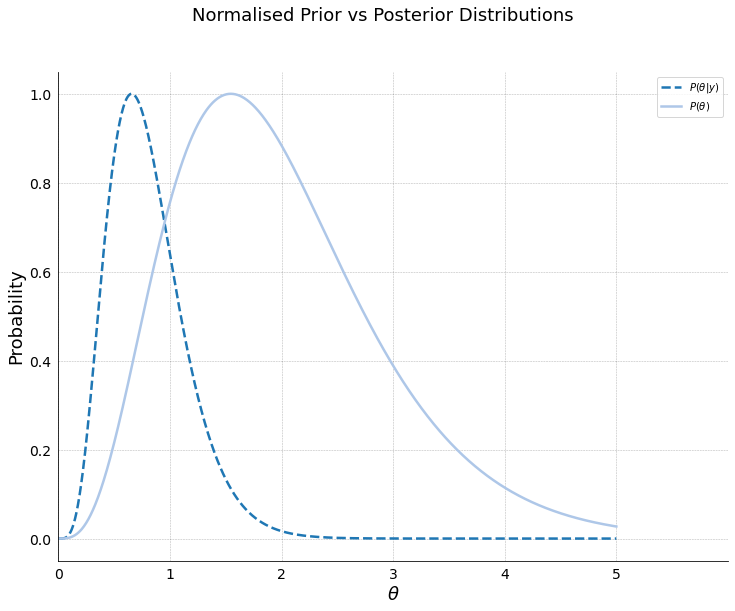

Prior is:
- for (0, 1.50):    0.3399
- for (1.50, 3.00): 0.5169
- for (3.00, ∞):    0.1432
Posterior is:
- for (0, 1.50):    0.9594
- for (1.50, 3.00): 0.0405
- for (3.00, ∞):    0.0000


In [79]:
"""
(c) Part 
"""
import numpy as np
from matplotlib import pyplot as plt
from scipy.special import gamma

import scipy.integrate as integrate
#import scipy.special as special

#gamma(3)
#gamma(4)
a = 4.4
b = 2.2
y = np.array([0.771, 0.140, 0.135, 0.007, 0.088, 0.008, 0.268, 0.022, 0.131, 0.142, 0.421, 0.125])
Nmax  = 5
theta = np.linspace(0, Nmax, 1000)

def prob(y, theta):
    return theta/2/np.prod(y**0.5)*np.exp(-theta*np.sum(y**0.5))

def prior(theta,a,b):
    """
    The Gamma prior
    """
    return b**a*theta**(a-1)*np.exp(-b*theta)/gamma(a)

def post(y, theta, a, b):
    return prob(y, theta)*prior(theta,a,b)

# You typically want your plot to be ~1.33x wider than tall.  
# Common sizes: (10, 7.5) and (12, 9)  
fig, ax = plt.subplots(1, 1, figsize=(12, 9))
# These are the colors that will be used in the plot
ax.set_prop_cycle(color=[
    '#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a',
    '#d62728', '#ff9896', '#9467bd', '#c5b0d5', '#8c564b', '#c49c94',
    '#e377c2', '#f7b6d2', '#7f7f7f', '#c7c7c7', '#bcbd22', '#dbdb8d',
    '#17becf', '#9edae5'])
# Remove the plot frame lines. They are unnecessary here.
ax.spines["top"].set_visible(False)
ax.spines['right'].set_visible(False)
# Ensure that the axis ticks only show up on the bottom and left of the plot.
# Ticks on the right and top of the plot are generally unnecessary.
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()
#fig.subplots_adjust(left=.06, right=.95, bottom=.02, top=.84)
# Limit the range of the plot to only where the data is.
# Avoid unnecessary whitespace.
ax.set_xlim(0, Nmax+1)
#ax.set_ylim(0, 1)
# Set a fixed location and format for ticks.
ax.set_xticks(range(0, Nmax+1, 1))
#ax.set_yticks(range(0, 1))
# Use automatic StrMethodFormatter creation
ax.xaxis.set_major_formatter('{x:.0f}')
#ax.yaxis.set_major_formatter('{x:.0f}')
# Provide tick lines across the plot to help your viewers trace along
# the axis ticks. Make sure that the lines are light and small so they
# don't obscure the primary data lines.
ax.grid(True, which='major', axis='both', ls='--', lw=.5, c='k', alpha=.3)
# Remove the tick marks; they are unnecessary with the tick lines we just
# plotted. Make sure your axis ticks are large enough to be easily read.
# You don't want your viewers squinting to read your plot.
ax.tick_params(axis='both', which='major', labelsize=14,
               bottom=False, top=False, labelbottom=True,
               left=False, right=False, labelleft=True)

# Make the title big enough so it spans the entire plot, but don't make it
# so big that it requires two lines to show.

# Note that if the title is descriptive enough, it is unnecessary to include
# axis labels; they are self-evident, in this plot's case.
fig.suptitle("Normalised Prior vs Posterior Distributions", fontsize=18, ha="center")

# Setting axes label
ax.set_xlabel(r'$\theta$', fontsize=18)
ax.set_ylabel(r'Probability', fontsize=18)
ax.plot(theta, post(y,theta,a,b)/max(post(y,theta,a,b)), '--', lw=2.5, label=r'$P\left(\theta|y\right)$')
ax.plot(theta, prior(theta,a,b)/max(prior(theta,a,b)),   '-',  lw=2.5, label=r'$P\left(\theta\right)$')
ax.legend()
#print(lnL(N))

# Finally, save the figure as a PNG.
# You can also save it as a PDF, JPEG, etc.
# Just change the file extension in this call.
fig.savefig('ABCPostPrior.png', bbox_inches='tight')
plt.show()

# Plotting the normalised Posterior and Prior probabilities
#plt.plot(theta, post(y,theta,a,b)/max(post(y,theta,a,b)), '--')
#plt.plot(theta, prior(theta,a,b)/max(prior(theta,a,b)), '-')
#plt.xlabel(r"\theta")
#plt.ylabel(r"Pr")

"""
Compute also probabilities that \theta is in (0, 1.50), or (1.50, 3.00), or (3.00, ∞),
for the prior and then for the posterior.
"""
# numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)

#num=1000
#theta=np.linspace(start, stop, num, endpoint=False)

# the probability is essentially an integral
def int_prior(a, b, start, stop):
    return integrate.quad(lambda theta: prior(theta, a, b), start, stop)

def int_posterior(y, a, b, start, stop):
    # normalising th integral
    normalisation = integrate.quad(lambda theta: post(y, theta, a, b), 0, np.inf)
    return integrate.quad(lambda theta: post(y, theta, a, b), start, stop)[0]/normalisation[0]

# Prior probabilities or a given interval
start=0.
stop=1.50
p1 = int_prior(a, b, start, stop)
start=1.50
stop=3.0
p2 = int_prior(a, b, start, stop)
start=3.0
stop=np.inf
p3 = int_prior(a, b, start, stop)
print(f"Prior is:")
print(f"- for (0, 1.50):    {p1[0]:0.4f}")
print(f"- for (1.50, 3.00): {p2[0]:0.4f}")
print(f"- for (3.00, ∞):    {p3[0]:0.4f}")

# Posterior probabilities in a given interval
start=0.
stop=1.50
p1 = int_posterior(y, a, b, start, stop)
start=1.50
stop=3.0
p2 = int_posterior(y, a, b, start, stop)
start=3.0
stop=np.inf
p3 = int_posterior(y, a, b, start, stop)
print(f"Posterior is:")
print(f"- for (0, 1.50):    {p1:0.4f}")
print(f"- for (1.50, 3.00): {p2:0.4f}")
print(f"- for (3.00, ∞):    {p3:0.4f}")


#print(f"The posterior probability of \theta in (0, 1.50) is:\n {post(y, theta, a, b)}")

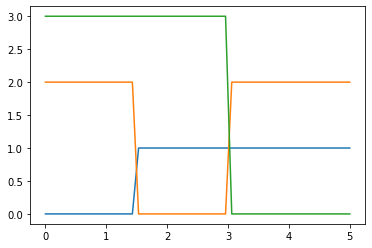

In [48]:
"""
this is for part d, just plots of loss functions
"""

theta = np.linspace(0,5)
LA = np.zeros_like(theta)
LA[theta > 1.5] = 1
LB = np.zeros_like(theta)
LB[(theta > 1.5) & (theta < 3)] = 2
LC = np.zeros_like(theta)
LC[theta < 3] = 3
plt.plot(LA)
plt.plot(theta,LA)
plt.plot(theta,LB)
plt.plot(theta,LC)
plt.xlabel(r'$\theta$')
plt.close()
plt.plot(theta, LA+LB+LC)
plt.plot(theta,LA)
plt.plot(theta,LB)
plt.plot(theta,LC)
plt.xlabel(r'$\theta$')
LB = np.zeros_like(theta)
LB[(theta > 1.5) | (theta < 3)] = 2
LB = np.zeros_like(theta)
LB[(theta < 1.5) | (theta > 3)] = 2
plt.close()
plt.plot(theta,LA)
plt.plot(theta,LB)
plt.plot(theta,LC)